### Reload plots for GEM-2 on NC, script on GEM-2_NC branch, and also use saved data from GEM-2_NC branch, but now for validation on Exp-3

## Conclusion? Does 5-coupled fit better than the other 2? - yes!

In [3]:
# magic lines that avoid re-start 
%load_ext autoreload
%autoreload 2

In [4]:
import pybamm as pb;import pandas as pd   ;import numpy as np;
import os; import seaborn as sns
import matplotlib.pyplot as plt;import os;import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp;
import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl; import json
import traceback
import multiprocessing
import scipy.optimize
import timeit
import random;import time, signal
fs=17;

font = {'family' : 'DejaVu Sans',  'size'   : fs}
mpl.rc('font', **font)

In [5]:
# define global index and dict for all experiment data - prepare for read!
Exp_Path = [
    "Expt 1 - Si-based Degradation/",
    "Expt 2,2 - C-based Degradation 2/",
    "Expt 3 - Cathode Degradation and Li-Plating/",
    "Expt 4 - Drive Cycle Aging (Control)/",
    "Expt 5 - Standard Cycle Aging (Control)/",]
Exp_head = [
    "Expt 1",
    "Expt 2,2",
    "Expt 3",
    "Expt 4",
    "Expt 5",]
Exp_1_Cell = ["A","B","J","D","E","F","K","L","M"];
Exp_1_Temp = {
    "A":"10","B":"10","J":"10",
    "D":"25","E":"25","F":"25",
    "K":"40","L":"40","M":"40",}
Temp_Cell_Exp_1 = {
    "10":["A","B","J"],
    "25":["D","E","F"],
    "40":["K","L","M"],}
Exp_2_Cell = ["A","B","C","D","E","F"];
Exp_2_Temp = {
    "A":"10","B":"10",
    "C":"25","D":"25",
    "E":"40","F":"40",}
Temp_Cell_Exp_2 = {
    "10":["A","B"],
    "25":["C","D"],
    "40":["E","F"],}
Exp_3_Cell = ["A","B","C","D","E","F","G","H","I"];
Exp_3_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25","F":"25",
    "G":"40","H":"40","I":"40"}
Temp_Cell_Exp_3 = {
    "10":["A","B","C"],
    "25":["D","E","F"],
    "40":["G","H","I"],}
Exp_4_Cell = ["A","B","C","D","E","F","G","H"];
Exp_4_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25",
    "F":"40","G":"40","H":"40",}
Temp_Cell_Exp_4 = {
    "10":["A","B","C"],
    "25":["D","E",],
    "40":["F","G","H"],}
Exp_5_Cell = ["A","B","C","D","E","F","G","H"];
Exp_5_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25",
    "F":"40","G":"40","H":"40",}
Temp_Cell_Exp_5 = {
    "10":["A","B","C"],
    "25":["D","E",],
    "40":["F","G","H"],}
Exp_All_Cell  = [Exp_1_Cell,Exp_2_Cell,Exp_3_Cell,Exp_4_Cell,Exp_5_Cell]
Exp_Temp_Cell = [Exp_1_Temp,Exp_2_Temp,Exp_3_Temp,Exp_4_Temp,Exp_5_Temp]
Temp_Cell_Exp_All = [Temp_Cell_Exp_1,Temp_Cell_Exp_2,Temp_Cell_Exp_3,Temp_Cell_Exp_4,Temp_Cell_Exp_5]
Mark_Cell_All = [
    {
    "A":"o","B":">","J":"v",
    "D":"o","E":">","F":"v",
    "K":"o","L":">","M":"v",},
    {
    "A":"10","B":"10",
    "C":"25","D":"25",
    "E":"40","F":"40",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">","F":"v",
    "G":"o","H":">","I":"v",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">",
    "F":"o","G":">","H":"v",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">",
    "F":"o","G":">","H":"v",}]
Color_Cell_All = [
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"J":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],"F":[0, 0, 0,0.7],
    "K":[1,0,0,0.4],"L":[1,0,0,0.4],"M":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"C":[0, 0, 0,0.7],
    "E":[1,0,0,0.4],"F":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],"F":[0, 0, 0,0.7],
    "G":[1,0,0,0.4],"H":[1,0,0,0.4],"I":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],
    "F":[1,0,0,0.4],"G":[1,0,0,0.4],"H":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],
    "F":[1,0,0,0.4],"G":[1,0,0,0.4],"H":[1,0,0,0.4],}]


In [8]:
# ready experiment data
import sys  
str_path_0 = os.path.abspath(os.path.join(pb.__path__[0],'..'))
str_path_1 = os.path.abspath(os.path.join(str_path_0,"wip/Rio_Code/Fun_P2"))
sys.path.append(str_path_1) 
from Fun_NC import * # directly do this for HPC
# Load Niall's data
Path_NiallDMA = os.path.expanduser("~/EnvPBGEM_NC/SimSave/InputData/") 
Exp_no = 3
Temp_Cell_Exp3 = Temp_Cell_Exp_All[Exp_no-1] 
Exp_3_AllData = Read_Exp(
    Path_NiallDMA,Exp_All_Cell[Exp_no-1],
    Exp_Path,Exp_head,Exp_Temp_Cell[Exp_no-1],
    Exp_no-1)

Finish reading Experiment!


In [9]:
SaveFig_Path = os.path.expanduser("~/EnvPBGEM_NC/SimSave/P2_R9_Dim/SaveFig") 

In [ ]:
Exp_3_AllData

In [11]:
import pickle
def Read_Model_BestFit(Path_to_Results, purpose_i, Pick, Re_No):
    purpose = f"/{purpose_i}_Case_{Pick}_{Pick}"
    path_i = Path_to_Results + purpose + "/Mats/" + f"{Pick}_Re_{Re_No}-midc_merge.pkl"
    #print(path_i)
    with open(path_i, 'rb') as file:
        data = pickle.load(file)
    return data

""" with open('bayes_opt_state.pkl', 'rb') as f:
    optimizer = pickle.load(f) """

BasicPath = os.path.expanduser(
    "~/EnvPBGEM_NC/SimSave/P2_R9_Dim/Run_On_NewBranch_NC_2/") 
purpose_i = "SEI_Exp1235_NC"
Path_to_Results = BasicPath + purpose_i + "/Results"

SEI_Exp3_GoodFit = {}
SEI_Exp3_GoodFit["10"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=7, Re_No=0)
SEI_Exp3_GoodFit["25"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=8, Re_No=0)
SEI_Exp3_GoodFit["40"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=9, Re_No=0)

In [12]:
BasicPath = os.path.expanduser(
    "~/EnvPBGEM_NC/SimSave/P2_R9_Dim/Run_On_NewBranch_NC_2/") 
purpose_i = "SEI_Dry_Exp1235_NC"
Path_to_Results = BasicPath + purpose_i + "/Results"

SEIDry_Exp3_GoodFit = {}
SEIDry_Exp3_GoodFit["10"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=7, Re_No=0)
SEIDry_Exp3_GoodFit["25"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=8, Re_No=0)
SEIDry_Exp3_GoodFit["40"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=9, Re_No=0)

In [13]:
BasicPath = os.path.expanduser(
    "~/EnvPBGEM_NC/SimSave/P2_R9_Dim/Run_On_NewBranch_NC_2/") 
purpose_i = "Full_Exp1235_NC"
Path_to_Results = BasicPath + purpose_i + "/Results"

Full_Exp3_GoodFit = {}
Full_Exp3_GoodFit["10"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=7, Re_No=0)
Full_Exp3_GoodFit["25"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=8, Re_No=0)
Full_Exp3_GoodFit["40"] = Read_Model_BestFit(Path_to_Results, purpose_i, Pick=9, Re_No=0)

In [14]:
SaveFig_Path = os.path.expanduser("~/EnvPBGEM_NC/SimSave/P2_R9_Dim/SaveFig")
Target = "R_240801_Exp3"
target_folder = os.path.join(SaveFig_Path, Target)
if not os.path.exists(target_folder):
    os.makedirs(target_folder)

In [15]:
Default_Colors_Alpha = [
    [31/255, 119/255, 180/255, 0.9], # like blue
    [44/255, 160/255, 44/255,  0.9], # like green  
    [214/255, 39/255, 40/255,  0.9], # like red
    [255/255, 127/255, 14/255, 0.9],]# like orange 
ps_num = 40; index_exp=3;  T_deg = 25; dpi = 300; 

In [16]:
print(len(Full_Exp3_GoodFit[str(T_deg)][0]["CD Time [h]"]))
print(T_deg)

13
25


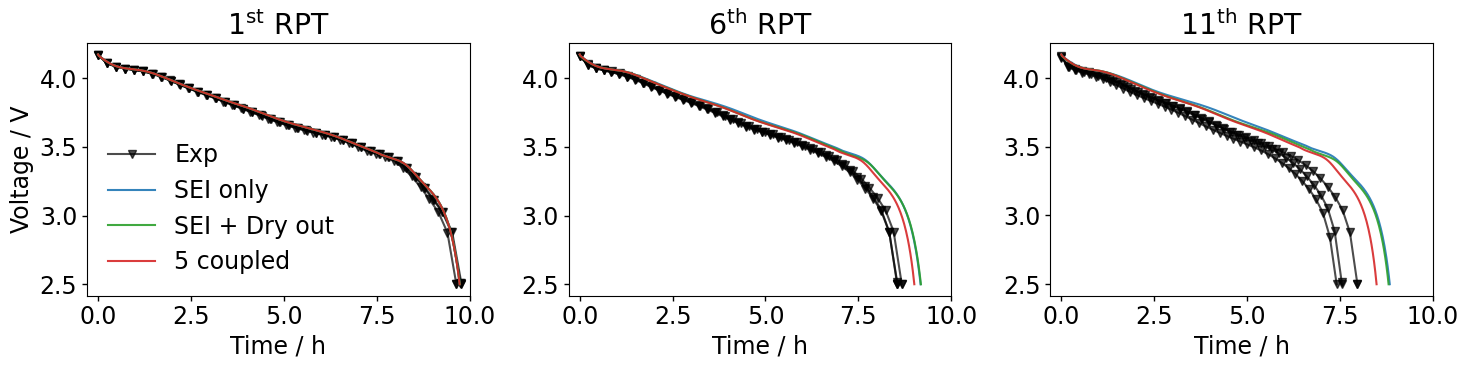

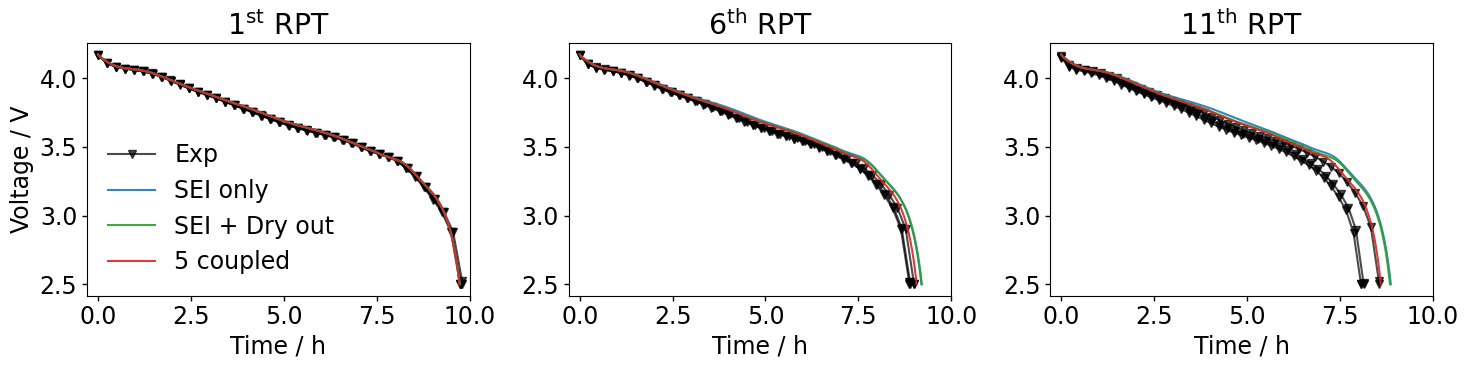

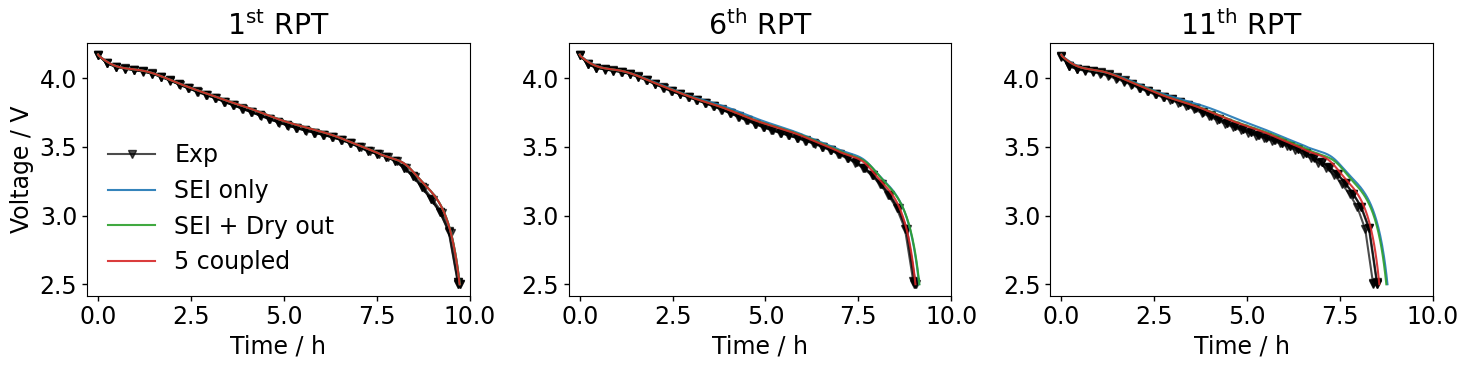

In [17]:
# Fig. 2
# 1 row * 3 columns; one T, 
def Plot_0P1C_V_3RPTs_compare_3Moldes(
    SaveFig_Path,Target,index_exp,Exp_3_AllData,
    SEI_Exp3_GoodFit,SEIDry_Exp3_GoodFit,Full_Exp3_GoodFit,
    T_deg,ps_num,RPT_picks,dpi,fs, ABC_labels, 
    SaveFig): 

    target_folder = os.path.join(SaveFig_Path, Target)
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    fig, axs = plt.subplots(1,3, figsize=(15,4),tight_layout=True)

    color_exp = [0, 0, 0, 0.7] 
    marker_exp = "v"
    for i,m in enumerate(RPT_picks):
        count = 0
        for cell in Temp_Cell_Exp_All[index_exp-1][str(T_deg)]:
            # plot less points
            x_data = np.array(
                Exp_3_AllData[cell]["0.1C voltage"][f"RPT{m}"]["Time (h)"]).tolist()
            y_data = np.array(
                Exp_3_AllData[cell]["0.1C voltage"][f"RPT{m}"]["Voltage (V)"]).tolist()
            step = len(x_data) // int(ps_num) 
            x_data_sliced = x_data[::step] + [x_data[-1]]
            y_data_sliced = y_data[::step] + [y_data[-1]]
            if count == 0:
                str_label = "Exp"
            else:
                str_label = None
            axs[i].plot(
                x_data_sliced,y_data_sliced, color=color_exp,
                marker=marker_exp, label=str_label)
            count += 1
        axs[i].plot(
            SEI_Exp3_GoodFit[str(T_deg)][0]["CD Time [h]"][m], 
            SEI_Exp3_GoodFit[str(T_deg)][0]["CD Terminal voltage [V]"][m],  
            '-', color = Default_Colors_Alpha[0],  label="SEI only") 
        axs[i].plot(
            SEIDry_Exp3_GoodFit[str(T_deg)][0]["CD Time [h]"][m], 
            SEIDry_Exp3_GoodFit[str(T_deg)][0]["CD Terminal voltage [V]"][m],     
            '-', color = Default_Colors_Alpha[1], label="SEI + Dry out")
        axs[i].plot(
            Full_Exp3_GoodFit[str(T_deg)][0]["CD Time [h]"][m], 
            Full_Exp3_GoodFit[str(T_deg)][0]["CD Terminal voltage [V]"][m],     
            '-', color = Default_Colors_Alpha[2], label="5 coupled")
    Titles = [
        r"1$^\mathrm{st}$ RPT",
        r"6$^\mathrm{th}$ RPT",
        r"11$^\mathrm{th}$ RPT",]
    for i,title in enumerate(Titles):
        axs[i].set_xlabel(r"Time / h") 
        labels = axs[i].get_xticklabels() + axs[i].get_yticklabels(); 
        [label.set_fontname('DejaVu Sans') for label in labels]
        axs[i].tick_params(labelcolor='k', labelsize=fs, width=1);del labels
        
        plt.subplots_adjust(top=0.4) 
        axs[i].set_title(title)
        axs[i].set_xlim(-0.3,10)
    axs[0].set_ylabel("Voltage / V")
    axs[0].legend(prop={'family':'DejaVu Sans','size':fs},loc='best',frameon=False)

    if SaveFig == True:
        plt.savefig(
            target_folder + f"/Exp-3 Compare voltage - {T_deg}degC.png", dpi=dpi)
        plt.savefig(
            target_folder + f"/Exp-3 Compare voltage - {T_deg}degC.svg")
        #plt.close() 
    return
ABC_labels = [ "(a)", "(b)", "(c)", ]

RPT_picks = [0,5,10];  T_deg =10; dpi = 800;   # m 
for T_deg in [10,25,40]:
    Plot_0P1C_V_3RPTs_compare_3Moldes(
        SaveFig_Path,Target,index_exp,Exp_3_AllData,
        SEI_Exp3_GoodFit,SEIDry_Exp3_GoodFit,Full_Exp3_GoodFit,
        T_deg,ps_num,RPT_picks,dpi,fs, ABC_labels,
        SaveFig=True)

T=10,SEI only:2.59
T=10,SEI + Dry out:2.42
T=10,5 coupled:2.22
T=25,SEI only:1.57
T=25,SEI + Dry out:1.42
T=25,5 coupled:1.16
T=40,SEI only:1.06
T=40,SEI + Dry out:0.89
T=40,5 coupled:0.61


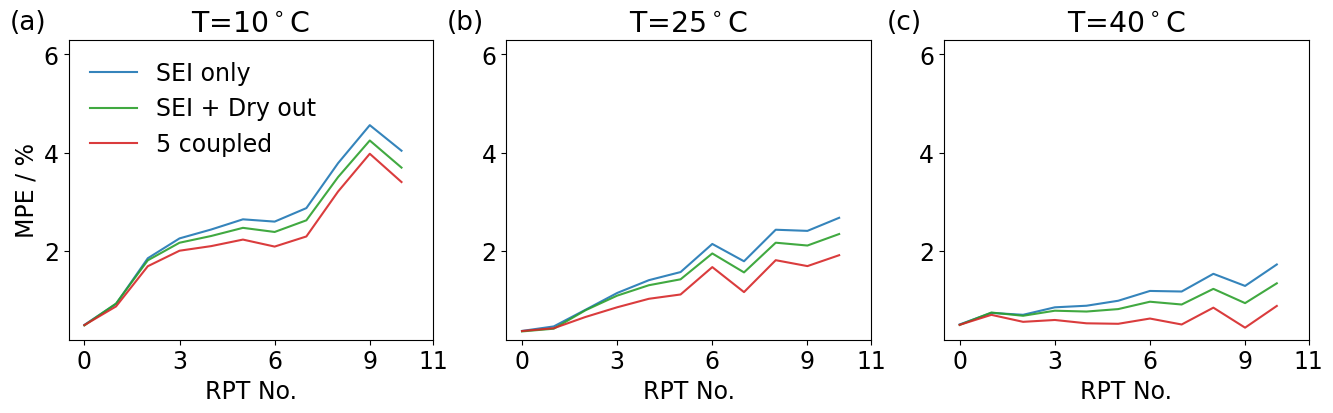

In [22]:
def mean_percentage_error(y_true, y_pred):
    A = y_true; B =  y_pred
    if 0 in A:
        indices = np.where(A == 0)[0]
        A = np.delete(A, indices)
        B = np.delete(B, indices)
        #print(A)
    errors = np.abs(A - B) / np.abs(A)
    mpe = np.mean(errors) * 100
    return mpe
def Calculate_MPE_General(x1,x2,y1,y2):
    from scipy.interpolate import interp1d
    min_x1, max_x1 = min(x1), max(x1)
    min_x2, max_x2 = min(x2), max(x2)

    min_x = max(min_x1, min_x2)
    max_x = min(max_x1, max_x2)

    x1 = np.clip(x1, min_x, max_x)
    x2 = np.clip(x2, min_x, max_x)

    f_interp1 = interp1d(x1, y1, kind='linear', fill_value='extrapolate')
    f_interp2 = interp1d(x2, y2, kind='linear', fill_value='extrapolate')

    num_points = 500  # Adjust this based on your preference
    common_x = np.linspace(min_x, max_x, num_points)

    y1_interp = f_interp1(common_x)
    y2_interp = f_interp2(common_x)

    mpe = mean_percentage_error(y1_interp, y2_interp)
    #print(f"Mean Percentage Error (MPE): {mpe:.2f}%")
    return mpe

def Calculate_0P1C_V_MPE(
        index_exp,Exp_3_AllData,
        case_i,  T_deg,m):
    Cells = Temp_Cell_Exp_All[index_exp-1][str(T_deg)]
    mpe_all = []
    for cell in Cells:
        x_true = np.array(
            Exp_3_AllData[cell]["0.1C voltage"][f"RPT{m}"]["Time (h)"]).tolist()
        y_true = np.array(
            Exp_3_AllData[cell]["0.1C voltage"][f"RPT{m}"]["Voltage (V)"]).tolist()
        x_model = case_i[str(T_deg)][0]["CD Time [h]"][m]
        y_model = case_i[str(T_deg)][0]["CD Terminal voltage [V]"][m]
        mpe_all .append( Calculate_MPE_General(x_true,x_model,y_true,y_model)  )
    mep_avg = sum(mpe_all) / len(mpe_all)
    return mep_avg

Cases = [SEI_Exp3_GoodFit,SEIDry_Exp3_GoodFit,Full_Exp3_GoodFit]; 
Str_cases = ["SEI only","SEI + Dry out","5 coupled",]
T_deg_All = [10,25,40] ; i_RPT=0
V_MPE_All = {}
for i,case in enumerate(Cases):
    V_MPE_All[Str_cases[i]] = {}
    for T_deg in T_deg_All:
        V_MPE_All[Str_cases[i]] [T_deg] = []

for i,case in enumerate(Cases):
    for T_deg in T_deg_All:
        for i_RPT in range(11):
            V_MPE_All[Str_cases[i]][T_deg].append(Calculate_0P1C_V_MPE(
                index_exp,Exp_3_AllData,
                Cases[i],T_deg,i_RPT)  )
i=0; T_deg=10



#print(f"{Str_cases[i]}, T={T_deg}degC")
#plt.plot( V_MPE_All[Str_cases[i]][T_deg])
fig, axs = plt.subplots(1,3, figsize=(16,4),gridspec_kw={'top': 0.9, 'bottom': 0.15})
for i_ax,T_deg in enumerate(T_deg_All):
    for j in range(len(Str_cases)):
        axs[i_ax].plot(V_MPE_All[Str_cases[j]][T_deg],  
            '-', color=Default_Colors_Alpha[j],  
            #linestyle=LS[0],
            label=Str_cases[j]) 
        axs[i_ax].set_xlabel(r"RPT No.") 
        axs[i_ax].set_ylim([0.2,6.3])
        axs[i_ax].set_xticks([0,3,6,9,11])
        axs[i_ax].set_title(f"T={T_deg}"+r"$^\circ$C")
    if i_ax == 0:
        axs[i_ax].legend(prop={'family':'DejaVu Sans','size':fs},loc='best',frameon=False)
        axs[i_ax].set_ylabel("MPE / %")
labels = ["(a)", "(b)", "(c)",]
for i in range(3):   
    axs[i].text(
        -0.06, 1.10, 
        labels[i], transform=axs[i].transAxes, 
        fontsize=fs+2,  # fontweight='bold', 
        va='top', ha='right')
    
plt.savefig(target_folder + f"/Exp-3 Fig. S5 (a~c) - MPE All 3Ts.png", dpi=800)
plt.savefig(target_folder + f"/Exp-3 Fig. S5 (a~c) - MPE All 3Ts.svg") 
for i_ax,T_deg in enumerate(T_deg_All):
    for j in range(len(Str_cases)):
        print(f"T={T_deg},{Str_cases[j]}:{np.mean(V_MPE_All[Str_cases[j]][T_deg]):.2f}")


T=10,SEI only:116.29
T=10,SEI + Dry out:111.77
T=10,5 coupled:99.35
T=25,SEI only:71.18
T=25,SEI + Dry out:67.26
T=25,5 coupled:51.57
T=40,SEI only:47.90
T=40,SEI + Dry out:43.68
T=40,5 coupled:26.01


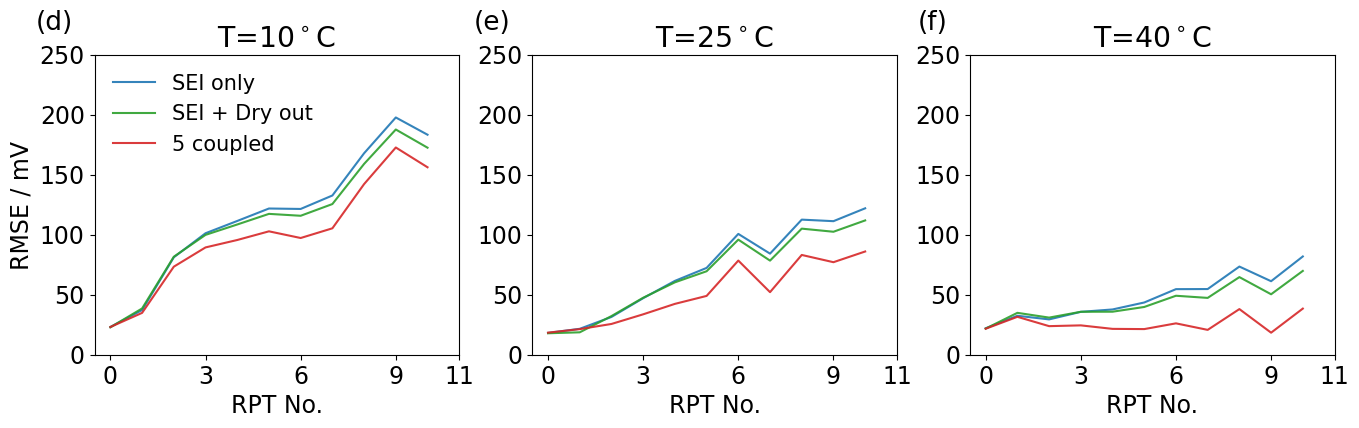

In [25]:
# calculate RMSE:
def Calculate_RMSE_General(x1,x2,y1,y2):
    from scipy.interpolate import interp1d
    min_x1, max_x1 = min(x1), max(x1)
    min_x2, max_x2 = min(x2), max(x2)

    min_x = max(min_x1, min_x2)
    max_x = min(max_x1, max_x2)

    x1 = np.clip(x1, min_x, max_x)
    x2 = np.clip(x2, min_x, max_x)

    f_interp1 = interp1d(x1, y1, kind='linear', fill_value='extrapolate')
    f_interp2 = interp1d(x2, y2, kind='linear', fill_value='extrapolate')

    num_points = 500  # Adjust this based on your preference
    common_x = np.linspace(min_x, max_x, num_points)

    y1_interp = f_interp1(common_x)
    y2_interp = f_interp2(common_x)

    RMSE =  np.sqrt(np.mean((y1_interp - y2_interp)**2)) 
    #print(f"Mean Percentage Error (MPE): {mpe:.2f}%")
    return RMSE

def Calculate_0P1C_V_RMSE(
        index_exp,Exp_3_AllData,
        case_i,  T_deg,m):
    Cells = Temp_Cell_Exp_All[index_exp-1][str(T_deg)]
    rmse_all = []
    for cell in Cells:
        x_true = np.array(
            Exp_3_AllData[cell]["0.1C voltage"][f"RPT{m}"]["Time (h)"]).tolist()
        y_true = np.array(
            Exp_3_AllData[cell]["0.1C voltage"][f"RPT{m}"]["Voltage (V)"]).tolist()
        x_model = case_i[str(T_deg)][0]["CD Time [h]"][m]
        y_model = case_i[str(T_deg)][0]["CD Terminal voltage [V]"][m]
        rmse_all .append( Calculate_RMSE_General(x_true,x_model,y_true,y_model)  )
    rmse_avg = sum(rmse_all) / len(rmse_all)
    return rmse_avg

V_RMSE_All = {}
for i,case in enumerate(Cases):
    V_RMSE_All[Str_cases[i]] = {}
    for T_deg in T_deg_All:
        V_RMSE_All[Str_cases[i]] [T_deg] = []

for i,case in enumerate(Cases):
    for T_deg in T_deg_All:
        for i_RPT in range(11):
            V_RMSE_All[Str_cases[i]][T_deg].append(Calculate_0P1C_V_RMSE(
                index_exp,Exp_3_AllData,
                Cases[i],T_deg,i_RPT)  )
i=0; T_deg=10
#print(f"{Str_cases[i]}, T={T_deg}degC")
#plt.plot( V_RMSE_All[Str_cases[i]][T_deg])
fig, axs = plt.subplots(1,3, figsize=(16,4),gridspec_kw={'top': 0.9, 'bottom': 0.15})
for i_ax,T_deg in enumerate(T_deg_All):
    for j in range(len(Str_cases)):
        axs[i_ax].plot(    np.array(V_RMSE_All[Str_cases[j]][T_deg]) * 1E3,  
            '-', color=Default_Colors_Alpha[j],  
            #linestyle=LS[0],
            label=Str_cases[j]) 
        axs[i_ax].set_xlabel(r"RPT No.") 
        axs[i_ax].set_ylim([0,250])
        axs[i_ax].set_xticks([0,3,6,9,11])
        axs[i_ax].set_title(f"T={T_deg}"+r"$^\circ$C")
    if i_ax == 0:
        axs[i_ax].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
        axs[i_ax].set_ylabel("RMSE / mV")
labels = ["(d)", "(e)", "(f)",]
for i in range(3):   
    axs[i].text(
        -0.06, 1.15, 
        labels[i], transform=axs[i].transAxes, 
        fontsize=fs+2,  # fontweight='bold', 
        va='top', ha='right')
    
# plt.savefig(target_folder + f"/Fig. S5 (d~f) - RMSE All 3Ts.png", dpi=800)
plt.savefig(target_folder + f"/Fig. S5 (d~f) - RMSE All 3Ts.svg") 
for i_ax,T_deg in enumerate(T_deg_All):
    for j in range(len(Str_cases)):
        rmse_i = np.mean(V_RMSE_All[Str_cases[j]][T_deg]) * 1E3
        print(f"T={T_deg},{Str_cases[j]}:{rmse_i:.2f}")

In [91]:
sum(SEIDry_Exp3_GoodFit[str(T_deg)][0]["CDend Porosity"][-1][0:10])

1.919244499260646

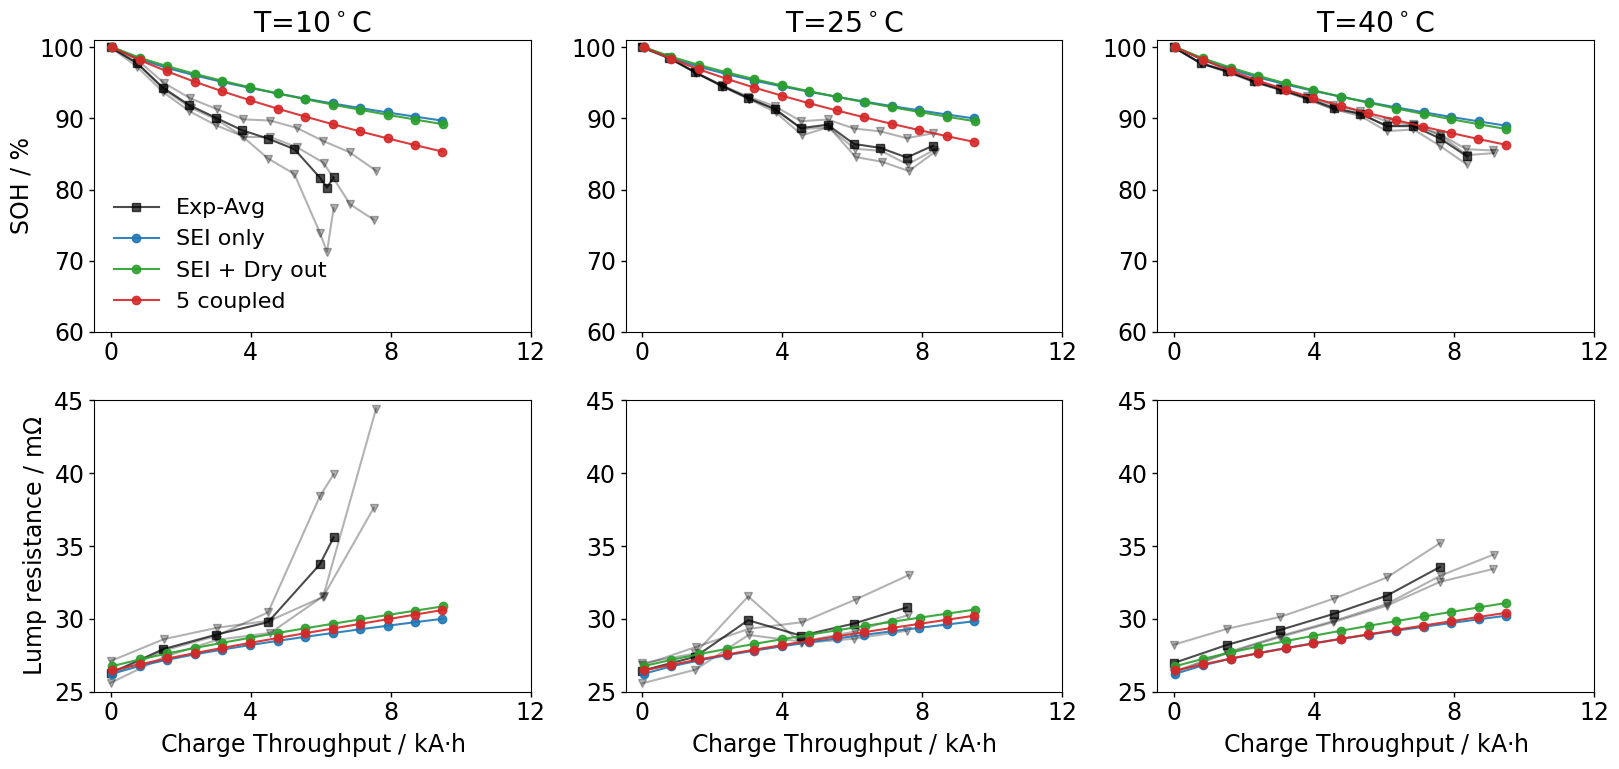

In [92]:
# Fig. 3 -  Validate SOH and Lump resistance for 3 Ts and 3 models
color_exp     = [0, 0, 0, 0.3]; marker_exp     = "v";
color_exp_Avg = [0, 0, 0, 0.7]; marker_exp_Avg = "s";
Exp_Any_AllData = Exp_3_AllData; 
Temp_Cell_Exp = Temp_Cell_Exp_All[index_exp-1] 

fig, axs = plt.subplots(2,3, figsize=(16.5,8),tight_layout=True) 
j=0
for i,T_deg in enumerate([10,25,40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[j,i].plot(
            chThr_temp,np.array(df_DMA["SoH"])*100,
            color=color_exp,marker=marker_exp,) # label=f"Cell {cell}" 
    axs[j,i].plot(
        X_1_st,Y_1_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    for k,case in enumerate(Cases):
        axs[j,i].plot(
            case[str(T_deg)][0]['Throughput capacity [kA.h]'], 
            case[str(T_deg)][0]['CDend SOH [%]'], 
            '-o', color = Default_Colors_Alpha[k], label=Str_cases[k])
    axs[j,i].set_ylim(60,101)
    axs[j,i].set_xticks([0,4,8,12])
    #axs[j,i].set_yticks([88,92,96,100])
    axs[j,i].set_title(f"T={T_deg}"+r"$^\circ$C")
axs[j,0].set_ylabel("SOH / %")
axs[j,0].legend(prop={'family':'DejaVu Sans','size':fs-1},loc='best',frameon=False)
for k in range(3):
    labels = axs[j,k].get_xticklabels() + axs[j,k].get_yticklabels(); 
    [label.set_fontname('DejaVu Sans') for label in labels]
    axs[j,k].tick_params(labelcolor='k', labelsize=fs, width=1);del labels  
j = 1
for i,T_deg in enumerate([10,25,40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        index_Res = df[df['0.1s Resistance (Ohms)'].le(10)].index
        axs[j,i].plot(
            np.array(df["Charge Throughput (A.h)"][index_Res])/1e3,
            np.array(df["0.1s Resistance (Ohms)"][index_Res])*1e3,
            color=color_exp,marker=marker_exp)
    axs[j,i].plot(
        X_5_st,Y_5_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    for k,case in enumerate(Cases):
        axs[j,i].plot(
            case[str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(case[str(T_deg)][0]["Res_midSOC"]), 
            '-o', color = Default_Colors_Alpha[k], label=Str_cases[k])
    axs[j,i].set_xlabel(r"Charge Throughput / kA$\cdot$h")
    axs[j,i].set_ylim(25,45)
    axs[j,i].set_xticks([0,4,8,12]);
axs[j,0].set_ylabel(r"Lump resistance / m$\Omega$")
for k in range(3):
    labels = axs[j,k].get_xticklabels() + axs[j,k].get_yticklabels(); 
    [label.set_fontname('DejaVu Sans') for label in labels]
    axs[j,k].tick_params(labelcolor='k', labelsize=fs, width=1);del labels  
plt.savefig(
    target_folder + f"/Fig.3 - Fit SOH and Resistance.png", dpi=dpi)
plt.savefig(
    target_folder + f"/Fig.3 - Fit SOH and Resistance.svg") 

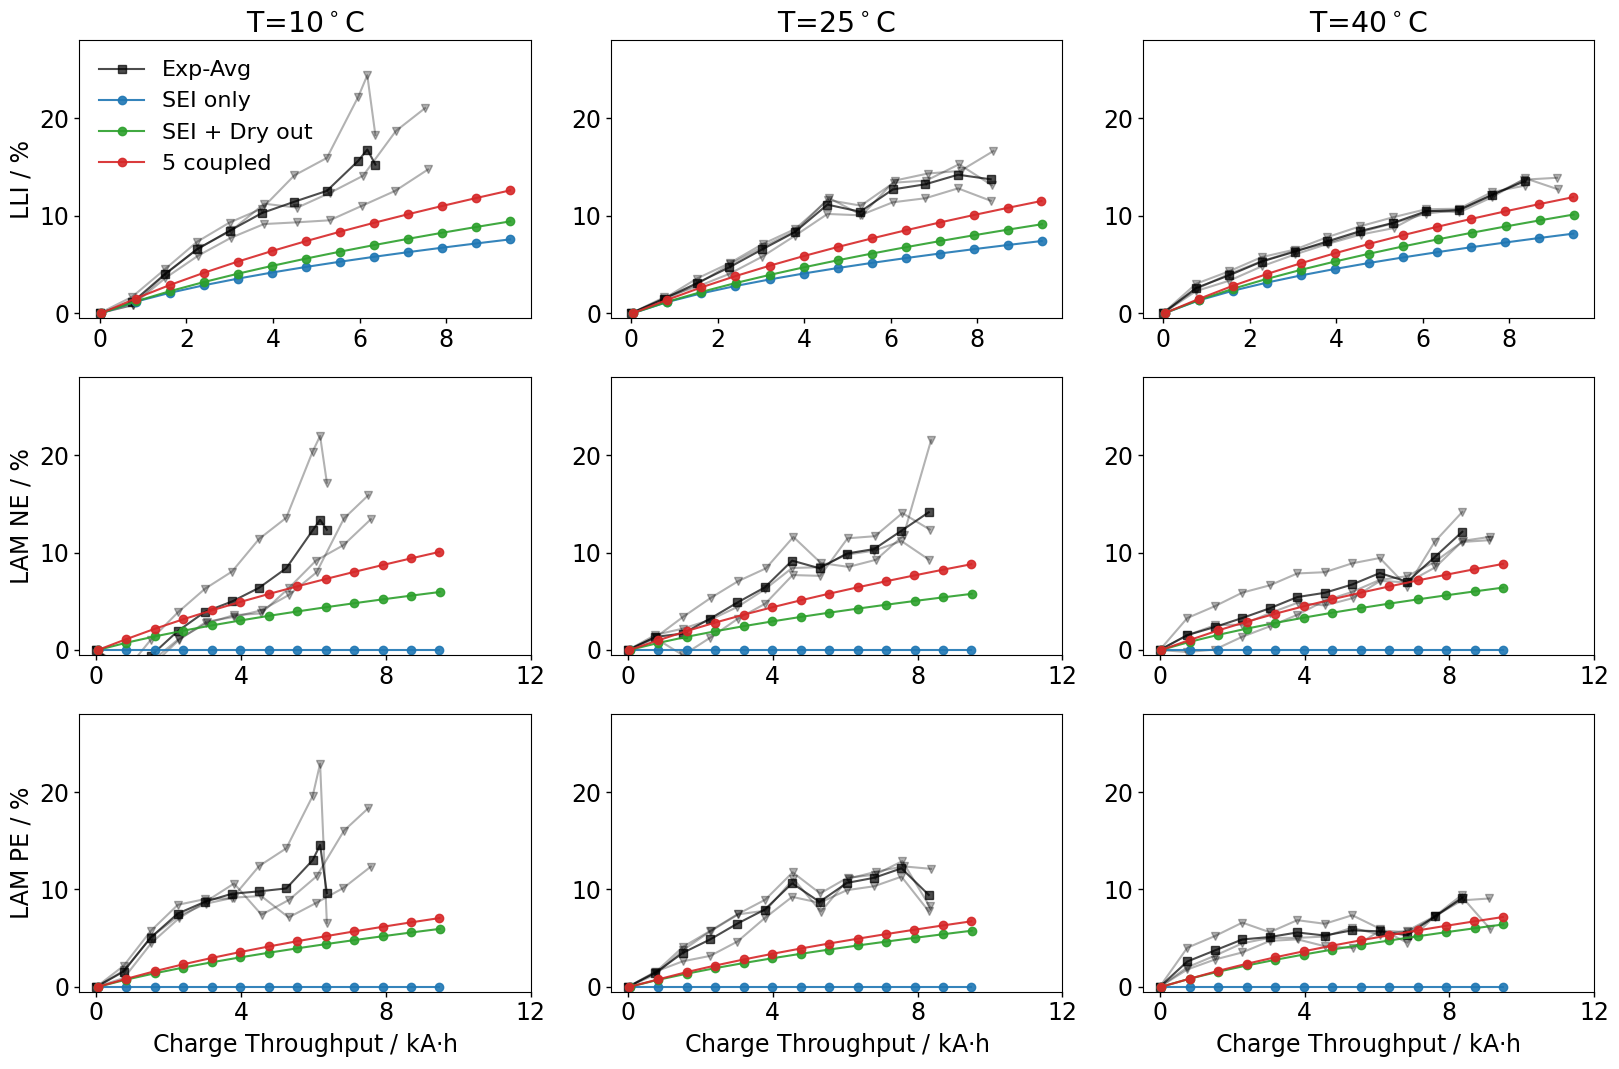

In [93]:
# Fig. 4 - DMA - LLI, LAM_Ne, LAM_Pe
fig, axs = plt.subplots(3,3, figsize=(16.5,11),tight_layout=True) 
j=0
for i,T_deg in enumerate([10,25,40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[j,i].plot(
            chThr_temp,np.array(df_DMA["LLI"])*100,
            color=color_exp,marker=marker_exp,) # label=f"Cell {cell}" 
    axs[j,i].plot(
        X_1_st,Y_2_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    for k,case in enumerate(Cases):
        axs[j,i].plot(
            case[str(T_deg)][0]['Throughput capacity [kA.h]'], 
            case[str(T_deg)][0]['CDend LLI [%]'], 
            '-o', color = Default_Colors_Alpha[k], label=Str_cases[k])
    axs[j,i].set_ylim(-0.5,28)
    #axs[j,i].set_xticks([0,4,8,12])
    axs[j,i].set_title(f"T={T_deg}"+r"$^\circ$C")
axs[j,0].set_ylabel("LLI / %")
axs[j,0].legend(prop={'family':'DejaVu Sans','size':fs-1},loc='best',frameon=False)
for k in range(3):
    labels = axs[j,k].get_xticklabels() + axs[j,k].get_yticklabels(); 
    [label.set_fontname('DejaVu Sans') for label in labels]
    axs[j,k].tick_params(labelcolor='k', labelsize=fs, width=1);del labels  
j = 1
for i,T_deg in enumerate([10,25,40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[j,i].plot(
            chThr_temp, np.array(df_DMA["LAM NE_tot"])*100,
            color=color_exp,marker=marker_exp)
    axs[j,i].plot(
        X_1_st,Y_3_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    for k,case in enumerate(Cases):
        axs[j,i].plot(
            case[str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(case[str(T_deg)][0]["CDend LAM_ne [%]"]), 
            '-o', color = Default_Colors_Alpha[k], label=Str_cases[k])
    axs[j,i].set_ylim(-0.5,28)
    axs[j,i].set_xticks([0,4,8,12]);
axs[j,0].set_ylabel("LAM NE / %")
for k in range(3):
    labels = axs[j,k].get_xticklabels() + axs[j,k].get_yticklabels(); 
    [label.set_fontname('DejaVu Sans') for label in labels]
    axs[j,k].tick_params(labelcolor='k', labelsize=fs, width=1);del labels  
j = 2
for i,T_deg in enumerate([10,25,40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[j,i].plot(
            chThr_temp, np.array(df_DMA["LAM PE"])*100,
            color=color_exp,marker=marker_exp)
    axs[j,i].plot(
        X_1_st,Y_4_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    for k,case in enumerate(Cases):
        axs[j,i].plot(
            case[str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(case[str(T_deg)][0]["CDend LAM_pe [%]"]), 
            '-o', color = Default_Colors_Alpha[k], label=Str_cases[k])
    axs[j,i].set_xlabel(r"Charge Throughput / kA$\cdot$h")
    axs[j,i].set_ylim(-0.5,28)
    axs[j,i].set_xticks([0,4,8,12]);
axs[j,0].set_ylabel("LAM PE / %")
for k in range(3):
    labels = axs[j,k].get_xticklabels() + axs[j,k].get_yticklabels(); 
    [label.set_fontname('DejaVu Sans') for label in labels]
    axs[j,k].tick_params(labelcolor='k', labelsize=fs, width=1);del labels  
plt.savefig(
    target_folder + f"/Fig.4 - Fit DMA-1.png", dpi=dpi)
plt.savefig(
    target_folder + f"/Fig.4 - Fit DMA-1.svg")  

In [31]:
labels = [f"({chr(97 + i)})" for i in range(15)]
print(labels)

['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(i)', '(j)', '(k)', '(l)', '(m)', '(n)', '(o)']


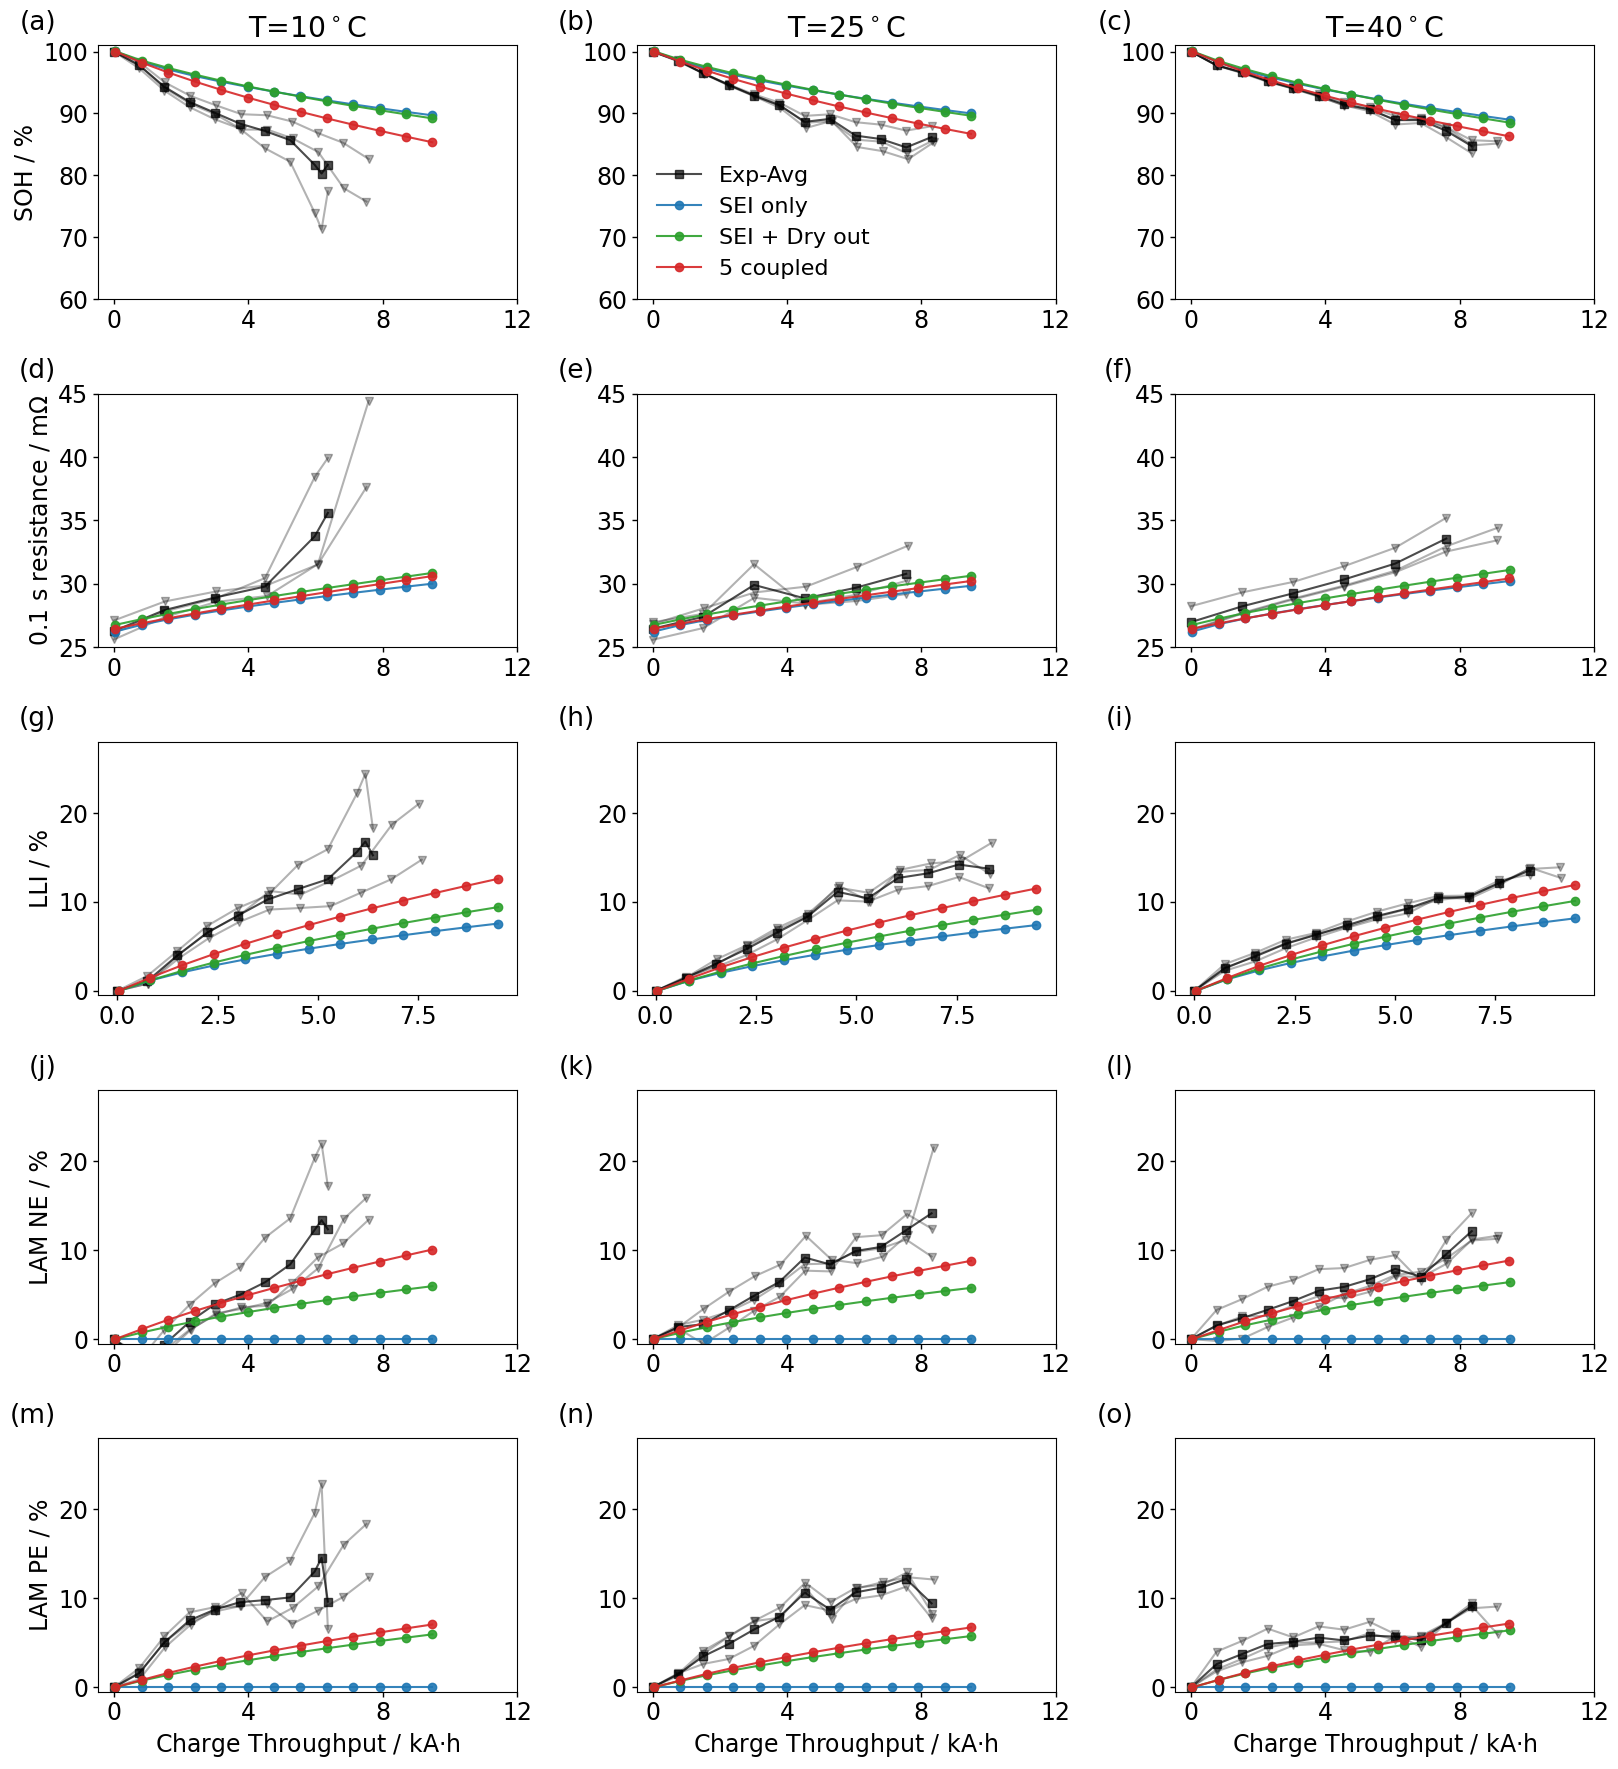

In [38]:
# Fig. 6
color_exp     = [0, 0, 0, 0.3]; marker_exp     = "v";
color_exp_Avg = [0, 0, 0, 0.7]; marker_exp_Avg = "s";
Exp_Any_AllData = Exp_3_AllData; 
Temp_Cell_Exp = Temp_Cell_Exp_All[index_exp-1] 

fig, Axs = plt.subplots(5,3, figsize=(16.5,18),tight_layout=True) 
axs = Axs.flatten()
j=0
for i,T_deg in enumerate([10,25,40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[j*3+i].plot(
            chThr_temp,np.array(df_DMA["SoH"])*100,
            color=color_exp,marker=marker_exp,) # label=f"Cell {cell}" 
    axs[j*3+i].plot(
        X_1_st,Y_1_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    for k,case in enumerate(Cases):
        axs[j*3+i].plot(
            case[str(T_deg)][0]['Throughput capacity [kA.h]'], 
            case[str(T_deg)][0]['CDend SOH [%]'], 
            '-o', color = Default_Colors_Alpha[k], label=Str_cases[k])
    axs[j*3+i].set_ylim(60,101)
    axs[j*3+i].set_xticks([0,4,8,12])
    #axs[j*3+i].set_yticks([88,92,96,100])
    axs[j*3+i].set_title(f"T={T_deg}"+r"$^\circ$C")
axs[j*3+0].set_ylabel("SOH / %")
axs[j*3+1].legend(prop={'family':'DejaVu Sans','size':fs-1},loc='best',frameon=False)
for k in range(3):
    labels = axs[j*3+k].get_xticklabels() + axs[j*3+k].get_yticklabels(); 
    [label.set_fontname('DejaVu Sans') for label in labels]
    axs[j*3+k].tick_params(labelcolor='k', labelsize=fs, width=1);del labels  
j = 1
for i,T_deg in enumerate([10,25,40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        index_Res = df[df['0.1s Resistance (Ohms)'].le(10)].index
        axs[j*3+i].plot(
            np.array(df["Charge Throughput (A.h)"][index_Res])/1e3,
            np.array(df["0.1s Resistance (Ohms)"][index_Res])*1e3,
            color=color_exp,marker=marker_exp)
    axs[j*3+i].plot(
        X_5_st,Y_5_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    for k,case in enumerate(Cases):
        axs[j*3+i].plot(
            case[str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(case[str(T_deg)][0]["Res_midSOC"]), 
            '-o', color = Default_Colors_Alpha[k], label=Str_cases[k])
    axs[j*3+i].set_ylim(25,45)
    axs[j*3+i].set_xticks([0,4,8,12]);
axs[j*3+0].set_ylabel(r"0.1 s resistance / m$\Omega$")
for k in range(3):
    labels = axs[j*3+k].get_xticklabels() + axs[j*3+k].get_yticklabels(); 
    [label.set_fontname('DejaVu Sans') for label in labels]
    axs[j*3+k].tick_params(labelcolor='k', labelsize=fs, width=1);del labels  
j=2
for i,T_deg in enumerate([10,25,40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[j*3+i].plot(
            chThr_temp,np.array(df_DMA["LLI"])*100,
            color=color_exp,marker=marker_exp,) # label=f"Cell {cell}" 
    axs[j*3+i].plot(
        X_1_st,Y_2_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    for k,case in enumerate(Cases):
        axs[j*3+i].plot(
            case[str(T_deg)][0]['Throughput capacity [kA.h]'], 
            case[str(T_deg)][0]['CDend LLI [%]'], 
            '-o', color = Default_Colors_Alpha[k], label=Str_cases[k])
    axs[j*3+i].set_ylim(-0.5,28)
    #axs[j*3+i].set_xticks([0,4,8,12])
    # axs[j*3+i].set_title(f"T={T_deg}"+r"$^\circ$C")
axs[j*3+0].set_ylabel("LLI / %")
#axs[j*3+0].legend(prop={'family':'DejaVu Sans','size':fs-1},loc='best',frameon=False)
for k in range(3):
    labels = axs[j*3+k].get_xticklabels() + axs[j*3+k].get_yticklabels(); 
    [label.set_fontname('DejaVu Sans') for label in labels]
    axs[j*3+k].tick_params(labelcolor='k', labelsize=fs, width=1);del labels  
j = 3
for i,T_deg in enumerate([10,25,40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[j*3+i].plot(
            chThr_temp, np.array(df_DMA["LAM NE_tot"])*100,
            color=color_exp,marker=marker_exp)
    axs[j*3+i].plot(
        X_1_st,Y_3_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    for k,case in enumerate(Cases):
        axs[j*3+i].plot(
            case[str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(case[str(T_deg)][0]["CDend LAM_ne [%]"]), 
            '-o', color = Default_Colors_Alpha[k], label=Str_cases[k])
    axs[j*3+i].set_ylim(-0.5,28)
    axs[j*3+i].set_xticks([0,4,8,12]);
axs[j*3+0].set_ylabel("LAM NE / %")
for k in range(3):
    labels = axs[j*3+k].get_xticklabels() + axs[j*3+k].get_yticklabels(); 
    [label.set_fontname('DejaVu Sans') for label in labels]
    axs[j*3+k].tick_params(labelcolor='k', labelsize=fs, width=1);del labels  
j = 4
for i,T_deg in enumerate([10,25,40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[j*3+i].plot(
            chThr_temp, np.array(df_DMA["LAM PE"])*100,
            color=color_exp,marker=marker_exp)
    axs[j*3+i].plot(
        X_1_st,Y_4_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    for k,case in enumerate(Cases):
        axs[j*3+i].plot(
            case[str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(case[str(T_deg)][0]["CDend LAM_pe [%]"]), 
            '-o', color = Default_Colors_Alpha[k], label=Str_cases[k])
    axs[j*3+i].set_xlabel(r"Charge Throughput / kA$\cdot$h")
    axs[j*3+i].set_ylim(-0.5,28)
    axs[j*3+i].set_xticks([0,4,8,12]);
axs[j*3+0].set_ylabel("LAM PE / %")
for k in range(3):
    labels = axs[j*3+k].get_xticklabels() + axs[j*3+k].get_yticklabels(); 
    [label.set_fontname('DejaVu Sans') for label in labels]
    axs[j*3+k].tick_params(labelcolor='k', labelsize=fs, width=1);del labels 
labels = [f"({chr(97 + i)})" for i in range(15)]
for i in range(15):   
    axs[i].text(
        -0.10, 1.14, 
        labels[i], transform=axs[i].transAxes, 
        fontsize=fs+2,  # fontweight='bold', 
        va='top', ha='right')

plt.savefig(target_folder + f"/Fig.6 - Model validation 5 indices Exp-3.png", dpi=dpi)
plt.savefig(target_folder + f"/Fig.6 - Model validation 5 indices Exp-3.svg")


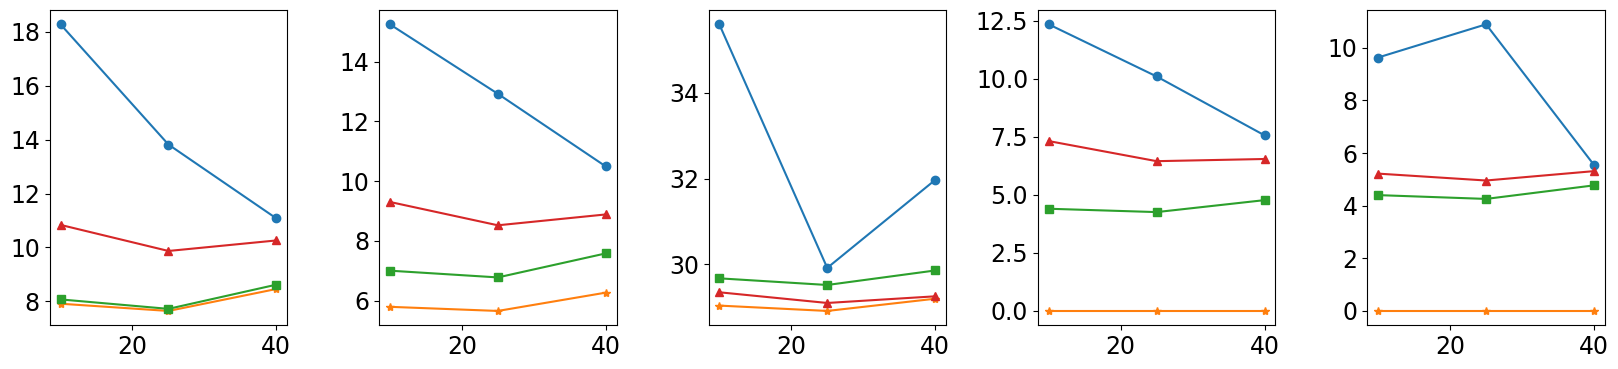

In [55]:
x_0 = 6.366576288
Exp3_exp_at_x_0 = {};            
Exp3_exp_at_x_0["x_0"] = x_0
Exp3_exp_at_x_0["Age_T"] = [10, 25, 40]
keys = ["SOH_loss", "LLI", "Res", "LLI", "LAM_Ne", "LAM_Pe"]
for key in keys:
    Exp3_exp_at_x_0[key] = []

Exp3_SEI_at_x_0 = {};            
Exp3_SEI_at_x_0["x_0"] = x_0
Exp3_SEI_at_x_0["Age_T"] = [10, 25, 40]
keys = ["SOH_loss", "LLI", "Res", "LLI", "LAM_Ne", "LAM_Pe"]
for key in keys:
    Exp3_SEI_at_x_0[key] = []

Exp3_SEIDry_at_x_0 = {};            
Exp3_SEIDry_at_x_0["x_0"] = x_0
Exp3_SEIDry_at_x_0["Age_T"] = [10, 25, 40]
keys = ["SOH_loss", "LLI", "Res", "LLI", "LAM_Ne", "LAM_Pe"]
for key in keys:
    Exp3_SEIDry_at_x_0[key] = []

Exp3_5couple_at_x_0 = {};            
Exp3_5couple_at_x_0["x_0"] = x_0
Exp3_5couple_at_x_0["Age_T"] = [10, 25, 40]
keys = ["SOH_loss", "LLI", "Res",  "LAM_Ne", "LAM_Pe"]
for key in keys:
    Exp3_5couple_at_x_0[key] = []


for i,T_deg in enumerate([10,25,40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    
    Exp3_exp_at_x_0["SOH_loss"].append(100-np.interp(x_0, X_1_st, Y_1_st_avg))
    Exp3_exp_at_x_0["LLI"].append(np.interp(x_0, X_1_st, Y_2_st_avg))
    Exp3_exp_at_x_0["Res"].append(np.interp(x_0, X_5_st, Y_5_st_avg))
    Exp3_exp_at_x_0["LAM_Ne"].append(np.interp(x_0, X_1_st, Y_3_st_avg))
    Exp3_exp_at_x_0["LAM_Pe"].append(np.interp(x_0, X_1_st, Y_4_st_avg))

    Exp3_SEI_at_x_0["SOH_loss"].append(100-np.interp(
        x_0, Cases[0][str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(Cases[0][str(T_deg)][0]["CDend SOH [%]"])  )  )
    Exp3_SEI_at_x_0["LLI"].append(np.interp(
        x_0, Cases[0][str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(Cases[0][str(T_deg)][0]["CDend LLI [%]"])  )  )
    Exp3_SEI_at_x_0["Res"].append(np.interp(
        x_0, Cases[0][str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(Cases[0][str(T_deg)][0]["Res_midSOC"])  )  )
    Exp3_SEI_at_x_0["LAM_Ne"].append(np.interp(
        x_0, Cases[0][str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(Cases[0][str(T_deg)][0]["CDend LAM_ne [%]"])  )  )
    Exp3_SEI_at_x_0["LAM_Pe"].append(np.interp(
        x_0, Cases[0][str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(Cases[0][str(T_deg)][0]["CDend LAM_pe [%]"])  )  )

    Exp3_SEIDry_at_x_0["SOH_loss"].append(100-np.interp(
        x_0, Cases[1][str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(Cases[1][str(T_deg)][0]["CDend SOH [%]"])  )  )
    Exp3_SEIDry_at_x_0["LLI"].append(np.interp(
        x_0, Cases[1][str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(Cases[1][str(T_deg)][0]["CDend LLI [%]"])  )  )
    Exp3_SEIDry_at_x_0["Res"].append(np.interp(
        x_0, Cases[1][str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(Cases[1][str(T_deg)][0]["Res_midSOC"])  )  )
    Exp3_SEIDry_at_x_0["LAM_Ne"].append(np.interp(
        x_0, Cases[1][str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(Cases[1][str(T_deg)][0]["CDend LAM_ne [%]"])  )  )
    Exp3_SEIDry_at_x_0["LAM_Pe"].append(np.interp(
        x_0, Cases[1][str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(Cases[1][str(T_deg)][0]["CDend LAM_pe [%]"])  )  )

    Exp3_5couple_at_x_0["SOH_loss"].append(100-np.interp(
        x_0, Cases[2][str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(Cases[2][str(T_deg)][0]["CDend SOH [%]"])  )  )
    Exp3_5couple_at_x_0["LLI"].append(np.interp(
        x_0, Cases[2][str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(Cases[2][str(T_deg)][0]["CDend LLI [%]"])  )  )
    Exp3_5couple_at_x_0["Res"].append(np.interp(
        x_0, Cases[2][str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(Cases[2][str(T_deg)][0]["Res_midSOC"])  )  )
    Exp3_5couple_at_x_0["LAM_Ne"].append(np.interp(
        x_0, Cases[2][str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(Cases[2][str(T_deg)][0]["CDend LAM_ne [%]"])  )  )
    Exp3_5couple_at_x_0["LAM_Pe"].append(np.interp(
        x_0, Cases[2][str(T_deg)][0]["Throughput capacity [kA.h]"], 
            np.array(Cases[2][str(T_deg)][0]["CDend LAM_pe [%]"])  )  )
# interpretate at 6.366576288:
fig, axs = plt.subplots(1,5, figsize=(16.5,4),tight_layout=True) 
for i in range(5):
    axs[i].plot(
        Exp3_exp_at_x_0["Age_T"],Exp3_exp_at_x_0[keys[i]],"-o") 
    axs[i].plot(
        Exp3_exp_at_x_0["Age_T"],Exp3_SEI_at_x_0[keys[i]],"-*") 
    axs[i].plot(
        Exp3_exp_at_x_0["Age_T"],Exp3_SEIDry_at_x_0[keys[i]],"-s") 
    axs[i].plot(
        Exp3_exp_at_x_0["Age_T"],Exp3_5couple_at_x_0[keys[i]],"-^") 

# save
Exp3 = [
    Exp3_exp_at_x_0, Exp3_SEI_at_x_0,
    Exp3_SEIDry_at_x_0, Exp3_5couple_at_x_0
]
import pickle
with open(
    SaveFig_Path + f'/T_dependency_Exp3.pkl', 'wb') as file:
    pickle.dump(Exp3, file)
    

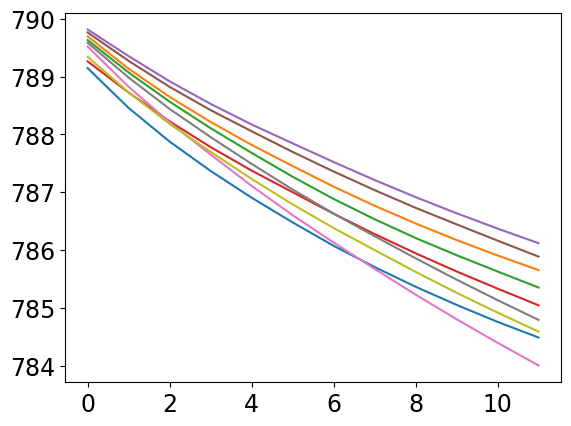

In [94]:

Cases = [SEI_Exp3_GoodFit,SEIDry_Exp3_GoodFit,Full_Exp3_GoodFit]; 
np.diff(Cases[0][str(40)][0]['Throughput capacity [kA.h]'])*1e3
for i in range(3):
    for T_deg in [10,25,40]:
        plt.plot(np.diff(Cases[i][str(T_deg)][0]['Throughput capacity [kA.h]'])*1e3)

In [95]:
# Get DVA 
def Get_DVA(data):
    M = len(data["CD Terminal voltage [V]"])
    data["CD Cap [A.h]"] = [];  data["CD SOC"] = [];
    data["CD dV_dQ_cell [V/Ah]"] = [];  data["CD dV_dQ_an [V/Ah]"] = [];
    data["CD dV_dQ_ca [V/Ah]"] = [];
    for m in range(M):
        V_cell = np.array(data["CD Terminal voltage [V]"][m])
        V_an   = np.array(data["CD Anode potential [V]"][m])
        V_ca   = np.array(data["CD Cathode potential [V]"][m])
        cap_dis= np.array(data["CD Time [h]"][m][-1]) * 0.5  - np.array(data["CD Time [h]"][m]) * 0.5 
        soc_dis= cap_dis / cap_dis[0] * 100
        dV_dQ_cell = np.diff(V_cell) / np.diff(cap_dis)
        dV_dQ_an = np.diff(V_an) / np.diff(cap_dis)
        dV_dQ_ca = np.diff(V_ca) / np.diff(cap_dis)
        data["CD Cap [A.h]"].append(cap_dis)
        data["CD SOC"].append(soc_dis)
        data["CD dV_dQ_cell [V/Ah]"].append(dV_dQ_cell)
        data["CD dV_dQ_an [V/Ah]"].append(dV_dQ_an)
        data["CD dV_dQ_ca [V/Ah]"].append(dV_dQ_ca)
    return data

Cases = [SEI_Exp3_GoodFit,SEIDry_Exp3_GoodFit,Full_Exp3_GoodFit]; 
T_deg_All = ["10","25","40"] 
for i,case_i in enumerate(Cases):
    for T_deg in T_deg_All:
        case_i[T_deg][0]  =  Get_DVA(case_i[T_deg][0])

In [ ]:
# Fig. 5 3*1 double y  -  compare DVA and voltage
# 3*2, only modelling results, no experimental data, each subplot has 4 lines, one BOL as 
# reference (all models are the same); three EOL for 3 models. 
# [0,0]  Ful voltage; [0,1]: Ful DVA
# [1,0]  Neg voltage; [1,1]: Neg DVA
# [2,0]  Pos voltage; [2,1]: Pos DVA
T_deg = 25; m = 10
def Plot_T_deg_m(T_deg,m,savefig):
    color_exp_Avg = [0, 0, 0, 0.7];
    Cases = [SEI_Exp3_GoodFit,SEIDry_Exp3_GoodFit,Full_Exp3_GoodFit]; 
    Str_cases = ["SEI only","SEI + Dry out","5 coupled",]
    Y_V_Strs = ["CD Terminal voltage [V]","CD Anode potential [V]", "CD Cathode potential [V]" ]
    Y_dV_Strs = ["CD dV_dQ_cell [V/Ah]","CD dV_dQ_an [V/Ah]", "CD dV_dQ_ca [V/Ah]" ]

    fig, axs = plt.subplots(3,1, figsize=(6,10),tight_layout=True)
    j=0; axs2 = [];
    for y_str,dy_str in zip(Y_V_Strs,Y_dV_Strs):
        # Plot voltage
        axs[j].plot(
            Cases[0][str(T_deg)][0]["CD Cap [A.h]"][0], 
            Cases[0][str(T_deg)][0][y_str][0],  
            '--', color = color_exp_Avg ,  label= "BOL" )
        for i,case in enumerate(Cases):
            axs[j].plot(
                case[str(T_deg)][0]["CD Cap [A.h]"][m], 
                case[str(T_deg)][0][y_str][m],  
                '--', color = Default_Colors_Alpha[i],  label=Str_cases[i])
        # Plot DVA    
        axi_2 = axs[j].twinx()
        axi_2.plot(
            Cases[0][str(T_deg)][0]["CD Cap [A.h]"][0][0:-1], 
            abs(Cases[0][str(T_deg)][0][dy_str][0]),  
            '-', color = color_exp_Avg ,  label= "BOL" )
        for i,case in enumerate(Cases):
            axi_2.plot(
                case[str(T_deg)][0]["CD Cap [A.h]"][m][0:-1], 
                abs(case[str(T_deg)][0][dy_str][m]),  
                '-', color = Default_Colors_Alpha[i],  label=Str_cases[i])
        axs2.append(axi_2)   
        j += 1

    for j in range(3):
        axs[j].set_xlim([-0.1,4.9])
        axs[j].set_xticks([0,  1.2, 2.4, 3.6, 4.8])
        axs2[j].set_xlim([-0.1,4.9])
        axs2[j].set_xticks([0,  1.2, 2.4, 3.6, 4.8])

    axs[0].set_ylabel("Voltage / V", fontsize=fs)
    axs2[0].set_ylabel("DVA / V/Ah", fontsize=fs)
    axs[1].set_ylabel("Voltage / V", fontsize=fs)
    axs2[1].set_ylabel("DVA / V/Ah", fontsize=fs)
    axs[2].set_ylabel("Voltage / V", fontsize=fs)
    axs2[2].set_ylabel("DVA / V/Ah", fontsize=fs)
    for i,y_title in enumerate(["Full", "Negative", "Positive"]):
        axs[i].set_title(y_title, fontsize=fs+2)
    axs2[0].set_ylim([-0.03,1.0])

    axs[1].set_ylim([-0.01,0.5])
    axs2[1].set_ylim([-0.03,1.6])

    axs[2].set_xlabel(r"Capacity / A$\cdot$h")
    for nn in range(3):
        labels = axs[nn].get_xticklabels() + axs[nn].get_yticklabels(); 
        [label.set_fontname('DejaVu Sans') for label in labels]
        axs[nn].tick_params(labelcolor='k', labelsize=fs, width=1);del labels  

        labels = axs2[nn].get_xticklabels() + axs2[nn].get_yticklabels(); 
        [label.set_fontname('DejaVu Sans') for label in labels]
        axs2[nn].tick_params(labelcolor='k', labelsize=fs, width=1);del labels  
        
    axs[2].legend(prop={'family':'DejaVu Sans','size':fs-3},loc='best',frameon=False) 
    if savefig: 
        plt.savefig(target_folder + f"/Fig.5 - double y T={T_deg}degC Voltage and DMA - RPT {m+1}.png", dpi=dpi)
        plt.savefig(target_folder + f"/Fig.5 - double y  T={T_deg}degC Voltage and DMA - RPT {m+1}.svg") 
    else: 
        pass
    return
for T_deg in [10,25,40]:
    for m in [10]:
        Plot_T_deg_m(T_deg,m,savefig=True)

In [ ]:
# Fig. 5 compare DVA
T_deg = 25; m = 10
color_exp_Avg = [0, 0, 0, 0.7];
#Cases = [SEI_Exp3_GoodFit,SEIDry_Exp3_GoodFit,Full_Exp3_GoodFit]; 
#Cases = [SEI_Exp3_GoodFit,SEIDry_Exp3_GoodFit,Full_Exp3_GoodFit]; 
Str_cases = ["SEI only","SEI + Dry out","5 coupled",]
Y_V_Strs = ["CD Terminal voltage [V]","CD Anode potential [V]", "CD Cathode potential [V]" ]
Y_dV_Strs = ["CD dV_dQ_cell [V/Ah]","CD dV_dQ_an [V/Ah]", "CD dV_dQ_ca [V/Ah]" ]

fig, axs = plt.subplots(3,1, figsize=(6,9),tight_layout=True)
for j,y_str in enumerate(Y_dV_Strs):
    axs[j].plot(
        Cases[0][str(T_deg)][0]["CD Cap [A.h]"][0][0:-1], 
        abs(Cases[0][str(T_deg)][0][y_str][0]),  
        '--', color = color_exp_Avg ,  label= "BOL" )
    for i,case in enumerate(Cases):
        axs[j].plot(
            case[str(T_deg)][0]["CD Cap [A.h]"][m][0:-1], 
            abs(case[str(T_deg)][0][y_str][m]),  
            '-', color = Default_Colors_Alpha[i],  label=Str_cases[i])

for nn in range(3):
    axs[nn].set_xlim([-0.1,4.9])
    axs[nn].set_xticks([0,  1.2, 2.4, 3.6, 4.8])
axs[0].set_title("DVA / V/Ah", fontsize=fs+2)
for i,y_title in enumerate(["Full", "Negative", "Positive"]):
    axs[i].set_ylabel(y_title, fontsize=fs+2)
axs[1].set_ylim([-0.03,1.0])
axs[2].set_xlabel(r"Capacity / A$\cdot$h")

for nn in range(3):
    labels = axs[nn].get_xticklabels() + axs[nn].get_yticklabels(); 
    [label.set_fontname('DejaVu Sans') for label in labels]
    axs[nn].tick_params(labelcolor='k', labelsize=fs, width=1);del labels  
axs[0].legend(prop={'family':'DejaVu Sans','size':fs-1},loc='best',frameon=False)
plt.savefig(
    target_folder + f"/Fig.5 - T={T_deg}degC Voltage and DMA - RPT {m+1}.png", dpi=dpi)
plt.savefig(
    target_folder + f"/Fig.5 - T={T_deg}degC Voltage and DMA - RPT {m+1}.svg")  

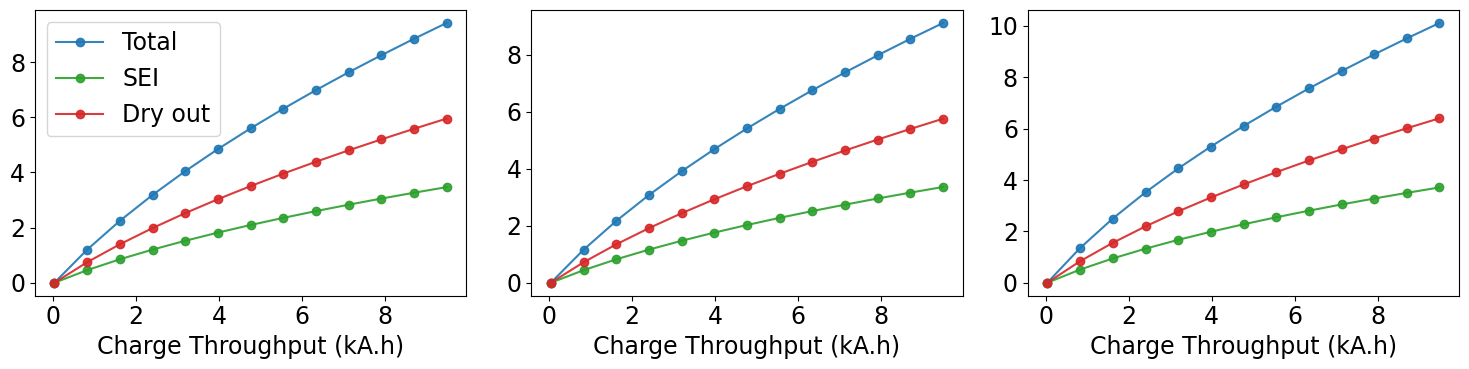

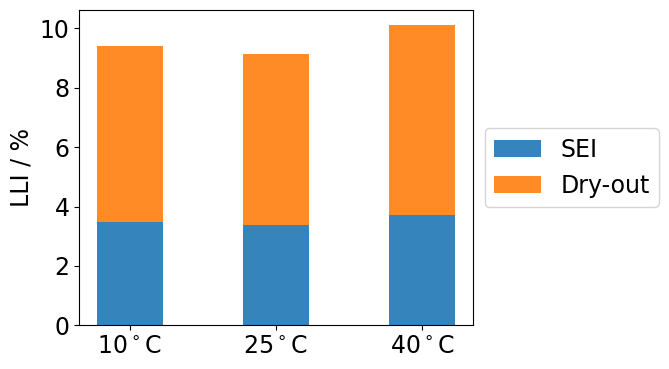

In [98]:
# plot break down of LLI for SEI-dry and Full
# - due to SEI and due to dry-out; 
# - due to SEI, SEI on crack, LiP and dry-out
case = SEIDry_Exp3_GoodFit
LLI_to_SEI_allTs=[]; LLI_to_Dry_allTs =[]
fig, axs = plt.subplots(1,3, figsize=(15,4),tight_layout=True) 
for i,T_deg in enumerate([10,25,40]):
    LLI_to_SEI = (
        np.array(case[str(T_deg)][0]['CDend LLI SEI on cracks [%]'])
        +
        np.array(case[str(T_deg)][0]['CDend LLI SEI [%]']) )
    LLI_to_Dry = (
        np.array(case[str(T_deg)][0]['CDend LLI [%]'])
        -
        LLI_to_SEI)
    LLI_to_SEI_allTs.append(LLI_to_SEI[-1])
    LLI_to_Dry_allTs.append(LLI_to_Dry[-1])
    axs[i].plot(
        case[str(T_deg)][0]['Throughput capacity [kA.h]'], 
        case[str(T_deg)][0]['CDend LLI [%]'], 
        '-o', color = Default_Colors_Alpha[0], label="Total")
    axs[i].plot(
        case[str(T_deg)][0]['Throughput capacity [kA.h]'], 
        LLI_to_SEI, 
        '-o', color = Default_Colors_Alpha[1], label="SEI")
    axs[i].plot(
        case[str(T_deg)][0]['Throughput capacity [kA.h]'], 
        LLI_to_Dry, 
        '-o', color = Default_Colors_Alpha[2], label="Dry out")
    axs[i].set_xlabel("Charge Throughput (kA.h)")
axs[0].legend()

# 
fig, ax = plt.subplots(figsize=(7,4),tight_layout=True) 
X_labels = (
    r"10$^\circ$C",  #axs[i].set_title(f"T={T_deg}"+r"$^\circ$C")
    r"25$^\circ$C",
    r"40$^\circ$C",
)
LLI_Components = {
    "SEI":     np.array(LLI_to_SEI_allTs),
    "Dry-out": np.array(LLI_to_Dry_allTs),
}
width = 0.45

bottom = np.zeros(3)
i=0
for key, weight_count in LLI_Components.items():
    p = ax.bar(X_labels, weight_count, width, 
               label=key, bottom=bottom,color=Default_Colors_Alpha[i])
    bottom += weight_count
    i += 3

legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel("LLI / %")
plt.savefig(
    target_folder + f"/SEI_DryOut LLI break down.png", dpi=800)
plt.savefig(
    target_folder + f"/SEI_DryOut LLI break down.svg")  

In [99]:
LLI_to_SEI_allTs

[np.float64(3.4658502853764235),
 np.float64(3.3632338002006854),
 np.float64(3.710921359116165)]

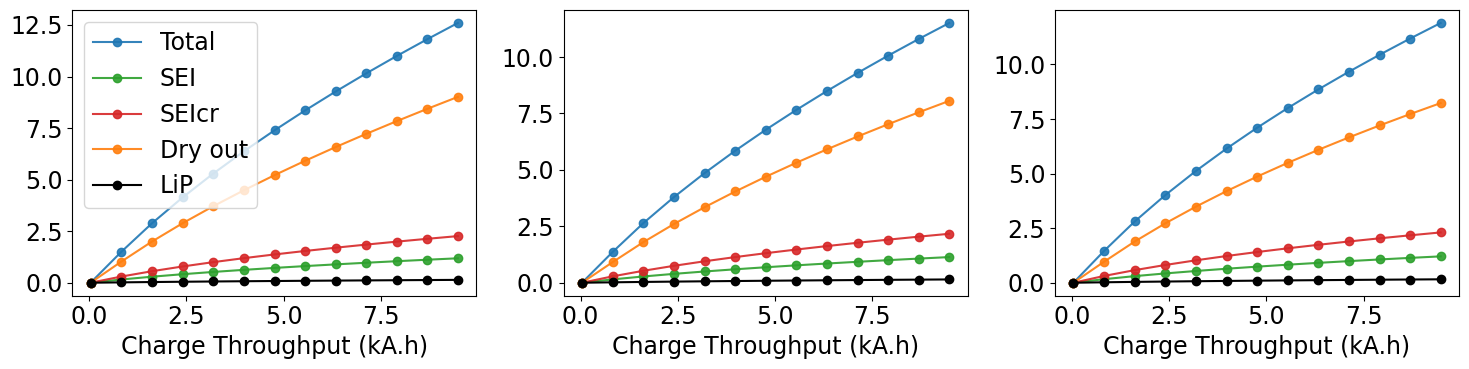

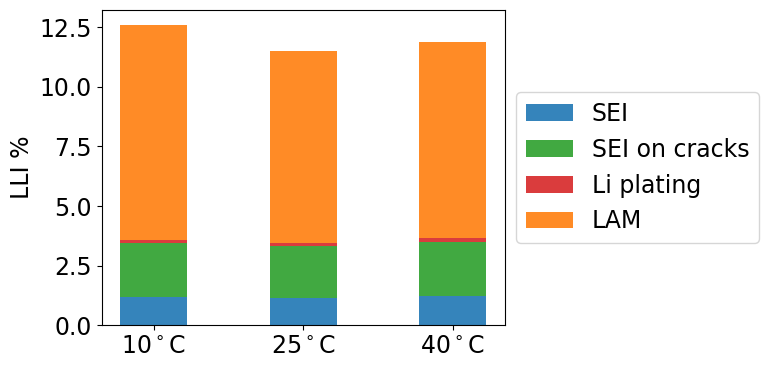

In [100]:
# - LLI  due to SEI, SEI on crack, LiP and dry-out
case = Full_Exp3_GoodFit
LLI_to_SEI_allTs=[];        LLI_to_Dry_allTs =[]; 
LLI_to_SEIcr_allTs = [];    LLI_to_LiP_allTs =[]; 
fig, axs = plt.subplots(1,3, figsize=(15,4),tight_layout=True) 
for i,T_deg in enumerate([10,25,40]):
    LLI_to_SEI = np.array(case[str(T_deg)][0]['CDend LLI SEI [%]'])
    LLI_to_SEIcr = np.array(case[str(T_deg)][0]['CDend LLI SEI on cracks [%]'])
    LLI_to_LiP = np.array(case[str(T_deg)][0]['CDend LLI lithium plating [%]'])
    LLI_to_Dry = (
        np.array(case[str(T_deg)][0]['CDend LLI [%]'])
        -LLI_to_SEI-LLI_to_LiP-LLI_to_SEIcr)
    
    LLI_to_SEI_allTs.append(LLI_to_SEI[-1])
    LLI_to_Dry_allTs.append(LLI_to_Dry[-1])
    LLI_to_SEIcr_allTs.append(LLI_to_SEIcr[-1])
    LLI_to_LiP_allTs.append(LLI_to_LiP[-1])
    axs[i].plot(
        case[str(T_deg)][0]['Throughput capacity [kA.h]'], 
        case[str(T_deg)][0]['CDend LLI [%]'], 
        '-o', color = Default_Colors_Alpha[0], label="Total")
    axs[i].plot(
        case[str(T_deg)][0]['Throughput capacity [kA.h]'], 
        LLI_to_SEI, 
        '-o', color = Default_Colors_Alpha[1], label="SEI")
    axs[i].plot(
        case[str(T_deg)][0]['Throughput capacity [kA.h]'], 
        LLI_to_SEIcr, 
        '-o', color = Default_Colors_Alpha[2], label="SEIcr")
    axs[i].plot(
        case[str(T_deg)][0]['Throughput capacity [kA.h]'], 
        LLI_to_Dry, 
        '-o', color = Default_Colors_Alpha[3], label="Dry out")
    axs[i].plot(
        case[str(T_deg)][0]['Throughput capacity [kA.h]'], 
        LLI_to_LiP, 
        '-o', color = "k", label="LiP")
    axs[i].set_xlabel("Charge Throughput (kA.h)")
axs[0].legend()

# 
fig, ax = plt.subplots(figsize=(8,4),tight_layout=True) 
X_labels = (
    r"10$^\circ$C",  #axs[i].set_title(f"T={T_deg}"+r"$^\circ$C")
    r"25$^\circ$C",
    r"40$^\circ$C",
)
LLI_Components = {
    "SEI":     np.array(LLI_to_SEI_allTs),
    "SEI on cracks":     np.array(LLI_to_SEIcr_allTs),
    "Li plating":     np.array(LLI_to_LiP_allTs),
    "LAM": np.array(LLI_to_Dry_allTs),
}
width = 0.45

bottom = np.zeros(3)
i=0
for key, weight_count in LLI_Components.items():
    p = ax.bar(X_labels, weight_count, width, label=key, bottom=bottom,color=Default_Colors_Alpha[i])
    bottom += weight_count
    i += 1

legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel("LLI %")
plt.savefig(
    target_folder + f"/Full LLI break down.png", dpi=800)
plt.savefig(
    target_folder + f"/Full LLI break down.svg")  

In [101]:
LAM_to_Dry   = 100-np.array(case[str(T_deg)][2]['Width_all'])/case[str(T_deg)][2]['Width_all'][0]*100
print(LAM_to_Dry)

[0.         0.         0.83586941 0.90948066 1.64481132 1.71407597
 2.37082655 2.43703966 3.03540391 3.09934724 3.65216011 3.71434417
 4.2303181  4.2910951  4.77647593 4.83609996 5.29554725 5.35420908
 5.79130845 5.84915612 6.26674348 6.32389416 6.72425402 6.78080425
 7.16581387]


[np.float64(3.0070185204440225), np.float64(2.0748228881702975), np.float64(1.666896909978723)]
[np.float64(6.217248937900877e-15), np.float64(6.217248937900877e-15), np.float64(2.3092638912203256e-14)]
[np.float64(7.05898038317973), np.float64(6.725146022959521), np.float64(7.165813869092418)]


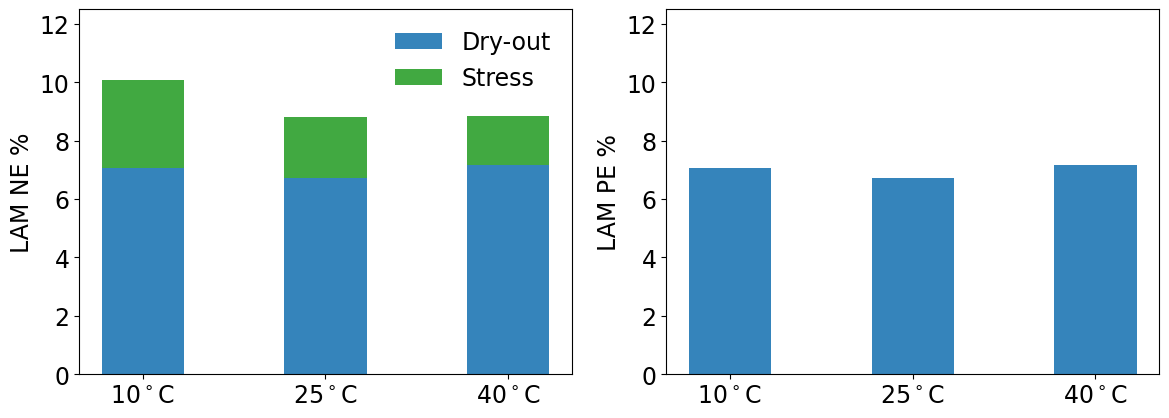

In [102]:
# plot break down of LAM for Full 
# LAM - due to cracking; due to dry-out
case = Full_Exp3_GoodFit
LAM_to_Crack_NE_allTs=[];        LAM_to_Dry_allTs =[];  LAM_to_Crack_PE_allTs=[];  

for i,T_deg in enumerate([10,25,40]):
    LAM_to_Dry   = 100-np.array(case[str(T_deg)][2]['Width_all'])/case[str(T_deg)][2]['Width_all'][0]*100

    LAM_to_Dry_allTs.append(LAM_to_Dry[-1])
    LAM_to_Crack_NE_allTs.append(case[str(T_deg)][0]['CDend LAM_ne [%]'][-1]-LAM_to_Dry[-1])
    LAM_to_Crack_PE_allTs.append(case[str(T_deg)][0]['CDend LAM_pe [%]'][-1]-LAM_to_Dry[-1])
print(LAM_to_Crack_NE_allTs)
print(LAM_to_Crack_PE_allTs)
print(LAM_to_Dry_allTs)
LAM_NE_Components = {
    "Dry-out": np.array(LAM_to_Dry_allTs),
    "Stress":     np.array(LAM_to_Crack_NE_allTs),}
LAM_PE_Components = {
    "Dry-out": np.array(LAM_to_Dry_allTs),
    "Stress":     np.array(LAM_to_Crack_PE_allTs),}
Labels = ["LAM NE %","LAM PE %"]
fig, axs = plt.subplots(1,2, figsize=(12,4.5),tight_layout=True) 
width = 0.45

LAM_Components_All = [LAM_NE_Components,LAM_PE_Components]
for k,LAM_Components in enumerate(LAM_Components_All):
    i=0;  bottom = np.zeros(3)
    for key, weight_count in LAM_Components.items():
        p = axs[k].bar(
            X_labels, weight_count, width, label=key, 
            bottom=bottom,color=Default_Colors_Alpha[i])
        bottom += weight_count
        i += 1
    axs[k].set_ylim(0,12.5) # Labels
    axs[k].set_ylabel(Labels[k])
legend = axs[0].legend(loc='best',frameon=False)
plt.savefig(
    target_folder + f"/Full LAM break down.png", dpi=dpi)
plt.savefig(
    target_folder + f"/Full LAM break down.svg") 

T=40
SEI only
1.98
6.07
42.58
100.00
100.00
32.07
SEI + Dry out
1.97
4.22
33.08
40.24
38.39
15.47
5 coupled
0.75
5.86
22.67
19.82
33.32
10.58


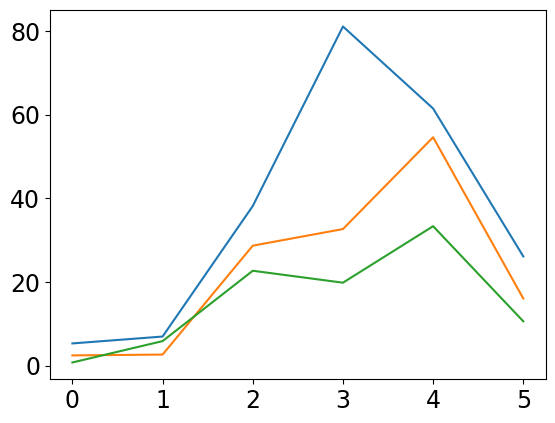

In [109]:
##### Evaluate errors:
# now compare SOH, resistance, and T rise

Cases = [SEI_Exp3_GoodFit,SEIDry_Exp3_GoodFit,Full_Exp3_GoodFit]; Str_cases = ["SEI only","SEI + Dry out","5 coupled",]
# [0,0] --> [0]; [1,1] --> [1]; [1,2] --> [2]
# [0,1] --> [0]; [0,2] --> [1]; [1,0] --> [2]


def Calculate_MPE_re(Temp_Cell_Exp,T_deg,case_i):

    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]

    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
    # model results
    my_dict_RPT =  case_i[str(T_deg)][0]
    mX_1 = my_dict_RPT['Throughput capacity [kA.h]']
    if mX_1[-1] > X_1_st[-1]:
        punish = 1; 
        mX_1_st = X_1_st   # do interpolation on modelling result
        mY_1_st = np.interp(mX_1_st,my_dict_RPT['Throughput capacity [kA.h]'], 
            my_dict_RPT['CDend SOH [%]'])
        mY_2_st = np.interp(mX_1_st,my_dict_RPT['Throughput capacity [kA.h]'], 
            my_dict_RPT["CDend LLI [%]"])
        mY_3_st = np.interp(mX_1_st,my_dict_RPT['Throughput capacity [kA.h]'], 
            my_dict_RPT["CDend LAM_ne [%]"])
        mY_4_st = np.interp(mX_1_st,my_dict_RPT['Throughput capacity [kA.h]'], 
            my_dict_RPT["CDend LAM_pe [%]"])
        mY_6_st = np.interp(mX_1_st,my_dict_RPT['Throughput capacity [kA.h]'], 
            my_dict_RPT["avg_Age_T"])
        # experiment result remain unchanged
        Y_1_st_avgm = np.array(Y_1_st_avg)
        Y_2_st_avgm = np.array(Y_2_st_avg)
        Y_3_st_avgm = np.array(Y_3_st_avg)
        Y_4_st_avgm = np.array(Y_4_st_avg)
        Y_6_st_avgm = np.array(Y_6_st_avg)
    else:                # do interpolation on expeirment results
        punish = X_1_st[-1] / mX_1[-1]  # punishment error, add when simulation end early
        mX_1_st = mX_1 #  standard for experiment following modelling
        Y_1_st_avgm = np.interp(mX_1_st,X_1_st,Y_1_st_avg)
        Y_2_st_avgm = np.interp(mX_1_st,X_1_st,Y_2_st_avg)
        Y_3_st_avgm = np.interp(mX_1_st,X_1_st,Y_3_st_avg)
        Y_4_st_avgm = np.interp(mX_1_st,X_1_st,Y_4_st_avg)
        Y_6_st_avgm = np.interp(mX_1_st,X_1_st,Y_6_st_avg)
        mY_1_st = np.array(my_dict_RPT['CDend SOH [%]'])
        mY_2_st = np.array(my_dict_RPT["CDend LLI [%]"])
        mY_3_st = np.array(my_dict_RPT["CDend LAM_ne [%]"])
        mY_4_st = np.array(my_dict_RPT["CDend LAM_pe [%]"])
        mY_6_st = np.array(my_dict_RPT["avg_Age_T"])
    if mX_1[-1] > X_5_st[-1]:
        mX_5_st = X_5_st   
        mY_5_st = np.interp(mX_5_st,my_dict_RPT['Throughput capacity [kA.h]'], 
            my_dict_RPT["Res_midSOC"])
        Y_5_st_avgm = np.array(Y_5_st_avg)
    else:
        mX_5_st = mX_1 #  standard for experiment following modelling
        mY_5_st = np.array(my_dict_RPT["Res_midSOC"])
        Y_5_st_avgm = np.interp(mX_5_st,X_5_st,Y_5_st_avg).tolist()
    # Now we can calculate MPE! mean_percentage_error
    mpe_1 = mean_percentage_error(Y_1_st_avgm, mY_1_st) # SOH [%]
    mpe_2 = mean_percentage_error(Y_2_st_avgm, mY_2_st) # LLI [%]
    mpe_3 = mean_percentage_error(Y_3_st_avgm, mY_3_st) # LAM_ne [%]
    mpe_4 = mean_percentage_error(Y_4_st_avgm, mY_4_st) # LAM_pe [%]
    mpe_5 = mean_percentage_error(Y_5_st_avgm, mY_5_st) # Res_midSOC
    mpe_6 = mean_percentage_error(Y_6_st_avgm, mY_6_st) # Age set average temperature (degC)
    # total MPE: TODO this is where weighting works
    # SOH and Resistance are directly measured so give more weight; 
    # DMA result is derived from pOCV and come with certain errors
    mpe_tot = 0.5* mpe_1 + 0.125* (mpe_2+mpe_3+mpe_4+mpe_5)
    mpe_pack = [mpe_1,mpe_5,mpe_2,mpe_3,mpe_4,mpe_tot]

    
    return mpe_pack

Exp_Any_AllData = Exp_3_AllData;  
Temp_Cell_Exp = Temp_Cell_Exp_All[index_exp-1] 
T_deg_All = [10,25,40] 

MPE_All = {}
for i,case in enumerate(Cases):
    MPE_All[Str_cases[i]] = []
for i,case in enumerate(Cases):
    for T_deg in T_deg_All:
        MPE_All[Str_cases[i]].append(Calculate_MPE_re(Temp_Cell_Exp,T_deg,case))
#print(MPE_All)
i=2
plt.plot(MPE_All[Str_cases[i]][0]) # T=10
plt.plot(MPE_All[Str_cases[i]][1]) # T=25
plt.plot(MPE_All[Str_cases[i]][2]) # T=25
# for 10degC:
j = 2
print(f"T={T_deg_All[j]}")
for i in range(3):
    print(Str_cases[i])
    for value in MPE_All[Str_cases[i]][j]:
        print(f"{value:.2f}")



In [ ]:
MPE_All

In [105]:
import pandas as pd
import numpy as np

# Assuming MPE_All is already defined
data = MPE_All['SEI + Dry out']

# Create a DataFrame
df = pd.DataFrame(data, index=['10 degC', '25 degC', '40 degC'])

# Optionally, add column names if needed
df.columns = [f'Value {i+1}' for i in range(df.shape[1])]

df

,Value 1,Value 2,Value 3,Value 4,Value 5,Value 6
10 degC,7.185838,6.220858,48.877681,83.064653,67.030372,29.242114
25 degC,4.061265,1.846588,42.378162,53.436078,60.342826,21.781089
40 degC,1.967566,4.215502,33.080499,40.244023,38.387974,15.474783
